# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [4]:
import pandas as pd
import numpy as np
import random

In [8]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

data.iloc[:, 1:]
 Label을 제외한 모든 독립변수의 데이터
data.iloc[:, 0]는 Label 데이터 즉 종속변수의 모든 데이터

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!
sklearn_StandardScaler 평균0,분산1로 표준화

In [13]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [14]:
# parameter 개수
N = len(X_train.loc[0])


In [15]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.72877512, 0.90328296, 0.02617728])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z =X_i \theta$

In [16]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]+parameters[i]
        #모수의 개수만큼 반복,매단계 모수 업데이트하여 적용
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-X_i\theta}}$

```
# 코드로 형식 지정됨
```

In [17]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [18]:
logistic(X_train.iloc[1], parameters)

0.9799203609737167

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =-\Sigma(y_ilogp(X_i)+(1-y_i)log(1-p(X_i))) $

In [20]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (y * np.log(p) + (1 - y) * np.log(1-p))
    return -loss

In [21]:
def mse_i(X, y, parameters):
    y_hat =  np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [22]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n  #loss 평균값으로 계산
    return loss

In [23]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

2.782213420237493

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma(y_i-\theta^{T}X_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma(y_i-p_i)X_{ij}$ 

In [24]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient =  (y - p) * X[j]
    return -gradient

In [25]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.028954463601818095

In [26]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [30]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [31]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[85.20559495548679, 3.2080868410222183, 35.3263652296592]

## mini-batch
인덱스로 미니 배치 나누기

In [43]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:
학습 한번에 임의의 1개 데이터에서부터 데이터의 일부,전체 데이터셋을 이용해 기울기를 업데이트 가능함.여기서 batch_size가 학습 한번에 몇개의 데이터를 학습할 것인가를 뜻하며,이에 따라 batch_size가 커지면 전체 데이터셋을 더 큰 덩어리로 나누어 학습하겠다는 의미이므로 데이터셋의 개수는 적어진다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [44]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters
    ##gradient를 바탕으로 learnin rate를 설정하고,gradient를 조정해 파라미터 수정 

In [45]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.72309437, 0.90306907, 0.02382204])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: 학습 한 번에 모든 데이터셋을 사용하여 기울기를 업데이트함

SGD: 학습 한 번에 임의의 1개의 데이터만 사용하여 기울기를 업데이트함

MGD: 학습 한 번에 데이터셋의 일부만 사용하여 기울기를 업데이트함

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [46]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function =  minus_log_cross_entropy_i if model == 'logistic' else mse_i
    #목적함수로 로지스틱 함수라면minus_log_cross_entropy_i,선형회귀라면 mse_i사용
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            #각 데이터의 batch설정
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
              #새로운 loss와 기존 loss의 차이가 tolerance보다 작다면 중단,아니면 갱신 
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [47]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_test.shape[0])
new_param_bgd

epoch: 0  loss: 2.105850698113235  params: [0.75241373 0.49982981 0.62172338]  gradients: [0.05458130979461286, 0.00305396976555286, 0.02440096215092667]
epoch: 100  loss: 1.3389215045650154  params: [ 2.95060867 -0.51240947 -6.96408476]  gradients: [-0.026483742973519464, -0.00217139986870048, 0.02269811800942419]
epoch: 200  loss: 1.3433244093344008  params: [  8.6754258   -0.03872823 -13.17919977]  gradients: [-0.026578474676703934, -0.0022531393556387137, 0.02261426923866877]
epoch: 300  loss: 1.3433400560603754  params: [ 14.40566696   0.44049749 -19.38872559]  gradients: [-0.026578809023947526, -0.0022534283471441164, 0.022613972647865792]
epoch: 400  loss: 1.3433401117282768  params: [ 20.13592734   0.91974288 -25.59823158]  gradients: [-0.026578810213458745, -0.0022534293752989607, 0.022613971592672883]
epoch: 500  loss: 1.343340111926338  params: [ 25.86618779   1.39898835 -31.8077375 ]  gradients: [-0.026578810217690936, -0.002253429378957058, 0.02261397158891858]
epoch: 600 

array([ 54.46018745,   3.79042321, -62.79317202])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

In [48]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size=30)
new_param_mgd

epoch: 0  loss: 1.9860057423154915  params: [-0.0236536   0.20904783  0.80914546]  gradients: [0.05048776225350479, 0.020655511270541528, 0.04788982892301628]
epoch: 100  loss: 1.3344306957250003  params: [  6.76634821  -0.4312647  -10.87364205]  gradients: [-0.02364028895687608, -0.0012116205451670893, 0.026975059597304757]
epoch: 200  loss: 1.3345044126479675  params: [ 16.31498494   0.36918502 -21.22304012]  gradients: [-0.023642509131350232, -0.0012136462777268986, 0.02697278352081717]
epoch: 300  loss: 1.3345044186307342  params: [ 25.86372364   1.16973912 -31.57233293]  gradients: [-0.023642509311512568, -0.0012136464421161352, 0.026972783336111496]
epoch: 400  loss: 1.3345044186312045  params: [ 35.41246234   1.97029322 -41.92162574]  gradients: [-0.023642509311526748, -0.0012136464421290698, 0.026972783336096973]
epoch: 500  loss: 1.3345044186312036  params: [ 44.96120104   2.77084732 -52.27091854]  gradients: [-0.023642509311526734, -0.0012136464421290542, 0.02697278333609699]

array([  92.60940717,    6.76561229, -103.91388965])

### Predict Label

In [49]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [50]:
from sklearn.metrics import *

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[39,  1],
       [10,  0]])

In [52]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.78


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [53]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [54]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [55]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.5688339, 2.650848 ])

In [58]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.4120035394355175  params: [1.1883193  1.02325116]  gradients: [0.024435034247000702, 0.014646110741896482]


array([0.8204588, 2.1434113])

In [59]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

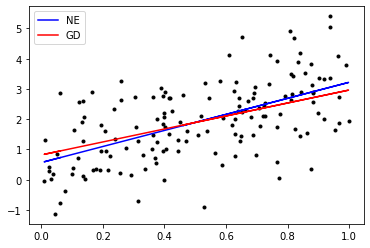

In [60]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()